### Technique 1 - Dropping constant features or low variance features

In [23]:
import pandas as pd
data = pd.read_csv("C:\\Users\\yashs\\OneDrive\\Desktop\\Kaggle\\Santander\\train.csv")

In [24]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [26]:
X=data.drop(['ID','TARGET'],axis=1)
Y=data['TARGET']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [29]:
from sklearn.feature_selection import VarianceThreshold

In [30]:
varth = VarianceThreshold(threshold=0)

In [31]:
#Threshold parameter simply means minimum variance that the feature has to have to be retained after this VarianceThreshold
#class fits on it
#We will fit and transform on the train dataset and only transform on the test dataset

#### Scaling needs to be performed before doing the variance threshold

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
mms = MinMaxScaler()

In [34]:
X_train_new = pd.DataFrame(data=mms.fit_transform(X_train),columns=X_train.columns)

In [35]:
X_test_new = pd.DataFrame(data=mms.transform(X_test),columns=X_test.columns)

### Variance threshold

In [36]:
from sklearn.feature_selection import VarianceThreshold

In [37]:
varth = VarianceThreshold(threshold=0.001)

In [38]:
X_train1 = X_train_new.copy()

In [39]:
varth.fit_transform(X_train1)

array([[0.99976406, 0.5       , 0.        , ..., 0.1       , 0.1       ,
        0.07634407],
       [0.99976406, 0.3       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.99976406, 0.33      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.99976406, 0.25      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.99976406, 0.22      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.99976406, 0.31      , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [40]:
varth.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True, False,  True,  True,
        True, False, False,  True,  True, False,  True,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,

In [41]:
sum(varth.get_support())

103

In [42]:
# True means that the feature was retained
# False means that the feature was discarded

In [43]:
X_train1 = pd.DataFrame(data=X_train1.loc[:,X_train1.columns[varth.get_support()]],
                        columns=X_train1.columns[varth.get_support()])

In [44]:
X_train1.shape

(53214, 103)

In [45]:
import numpy as np

In [46]:
np.var(X_train_new.iloc[:,2])

5.85366242572277e-05

#### On the test set

In [47]:
varth.transform(X_test)

array([[2.0000000e+00, 2.5000000e+01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0000000e+00, 3.3000000e+01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0000000e+00, 2.5000000e+01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.0000000e+00, 5.2000000e+01, 0.0000000e+00, ..., 2.8500000e+05,
        2.8500000e+05, 1.9316667e+05],
       [2.0000000e+00, 2.3000000e+01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0000000e+00, 4.7000000e+01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [48]:
X_test1 = pd.DataFrame(data=varth.transform(X_test),columns=X_train1.columns)

In [49]:
X_test2 = X_test1.loc[:,X_train1.columns]

In [51]:
X_test = X_test.loc[:,X_train1.columns]

In [52]:
X_test1.equals(X_test)

False

### Technique 2 - Mutual information

In [290]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [291]:
data = load_breast_cancer()

In [292]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [293]:
X = pd.DataFrame(data=data.data,columns=data.feature_names)
Y = pd.Series(data.target)

In [294]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

### Mutual information

In [155]:
import matplotlib.pyplot as plt

In [296]:
# Let's say we are comparing two random variables(X & Y), then the mutual information for X and Y is given as the
# average amount of information that x conveys about y
# In other words, Mutual information is calculated between two variables and measures the reduction in uncertainty 
#for one variable given a known value of the other variable.

In [157]:
from sklearn.feature_selection import mutual_info_classif

In [158]:
arr1=mutual_info_classif(X_train,Y_train)
arr1

array([0.39933773, 0.12300827, 0.43289312, 0.39537118, 0.06733596,
       0.22287437, 0.38035382, 0.44247967, 0.04996189, 0.02986058,
       0.24838119, 0.        , 0.26715425, 0.35723299, 0.01238132,
       0.0658173 , 0.1181736 , 0.13289517, 0.        , 0.05894698,
       0.48016515, 0.12610317, 0.5124356 , 0.49071179, 0.08554638,
       0.24782641, 0.35277489, 0.47434714, 0.10821549, 0.04635161])

In [159]:
mutual_information_features = pd.Series(index=X_train.columns,data=arr1)

In [160]:
mutual_information_features=mutual_information_features.sort_values(ascending=False)

In [161]:
mutual_information_features

worst perimeter            0.512436
worst area                 0.490712
worst radius               0.480165
worst concave points       0.474347
mean concave points        0.442480
mean perimeter             0.432893
mean radius                0.399338
mean area                  0.395371
mean concavity             0.380354
area error                 0.357233
worst concavity            0.352775
perimeter error            0.267154
radius error               0.248381
worst compactness          0.247826
mean compactness           0.222874
concave points error       0.132895
worst texture              0.126103
mean texture               0.123008
concavity error            0.118174
worst symmetry             0.108215
worst smoothness           0.085546
mean smoothness            0.067336
compactness error          0.065817
fractal dimension error    0.058947
mean symmetry              0.049962
worst fractal dimension    0.046352
mean fractal dimension     0.029861
smoothness error           0

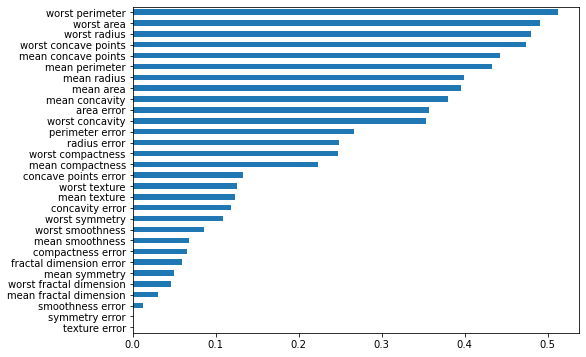

In [162]:
plt.figure(figsize=(8,6))
#ax=mutual_information_features.plot(kind='barh')
#ax.invert_yaxis()
mutual_information_features.sort_values(ascending=True).plot(kind='barh')
plt.show()

In [163]:
import seaborn as sns

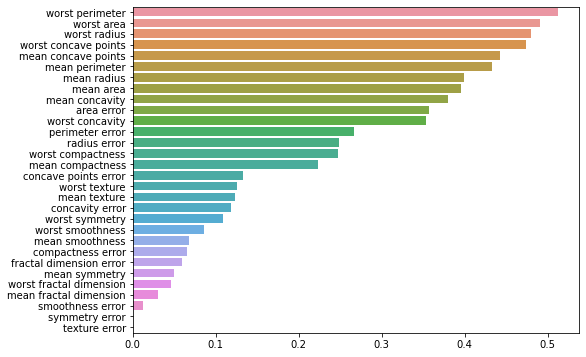

In [164]:
plt.figure(figsize=(8,6))
sns.barplot(x=mutual_information_features.values,
            y=mutual_information_features.index)
plt.show()

### Mutual Information -  Regression

In [3]:
df = pd.read_csv('C:\\Users\\yashs\\OneDrive\\Desktop\\Kaggle\\House Prices\\Train_New.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
num_col = df.select_dtypes(include=['int','float']).columns.tolist()

In [7]:
len(num_col)

38

In [8]:
from sklearn.feature_selection import mutual_info_regression

In [10]:
import seaborn as sns

<AxesSubplot:>

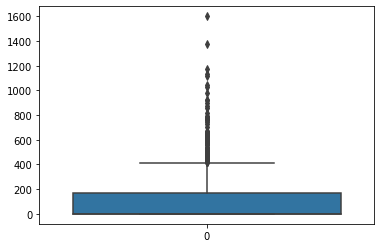

In [11]:
sns.boxplot(data=df["MasVnrArea"])

In [12]:
df["LotFrontage"].median()

69.0

In [13]:
df["LotFrontage"].fillna(value=df["LotFrontage"].median(),inplace=True)

In [14]:
df['GarageYrBlt'].fillna(value=df["GarageYrBlt"].median(),inplace=True)

In [15]:
df['MasVnrArea'].fillna(value=df["MasVnrArea"].median(),inplace=True)

In [16]:
X=df[num_col].drop('SalePrice',axis=1)
Y=df['SalePrice']

In [17]:
X.isnull().sum()[X.isnull().sum()!=0]

Series([], dtype: int64)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [178]:
arr2=mutual_info_regression(X_train,Y_train)
arr2

array([4.42673651e-03, 2.53644474e-01, 2.10111274e-01, 1.63896687e-01,
       5.33335316e-01, 1.02680308e-01, 3.41601605e-01, 2.62115687e-01,
       7.18672888e-02, 1.50177480e-01, 2.03331051e-02, 9.46802057e-02,
       3.46821703e-01, 3.05058123e-01, 1.82610087e-01, 5.38950848e-03,
       4.41024024e-01, 0.00000000e+00, 0.00000000e+00, 2.53025754e-01,
       6.46677208e-02, 4.10740174e-02, 1.06684109e-02, 1.79108264e-01,
       1.45333069e-01, 2.75130677e-01, 3.65163550e-01, 3.51988916e-01,
       8.13585397e-02, 1.57061600e-01, 3.37739451e-02, 0.00000000e+00,
       3.29819388e-03, 6.52097151e-03, 0.00000000e+00, 0.00000000e+00,
       2.66386032e-04])

In [179]:
mutual_information_features_reg = pd.Series(index=X_train.columns,data=arr2)
mutual_information_features_reg

Id               0.004427
MSSubClass       0.253644
LotFrontage      0.210111
LotArea          0.163897
OverallQual      0.533335
OverallCond      0.102680
YearBuilt        0.341602
YearRemodAdd     0.262116
MasVnrArea       0.071867
BsmtFinSF1       0.150177
BsmtFinSF2       0.020333
BsmtUnfSF        0.094680
TotalBsmtSF      0.346822
1stFlrSF         0.305058
2ndFlrSF         0.182610
LowQualFinSF     0.005390
GrLivArea        0.441024
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.253026
HalfBath         0.064668
BedroomAbvGr     0.041074
KitchenAbvGr     0.010668
TotRmsAbvGrd     0.179108
Fireplaces       0.145333
GarageYrBlt      0.275131
GarageCars       0.365164
GarageArea       0.351989
WoodDeckSF       0.081359
OpenPorchSF      0.157062
EnclosedPorch    0.033774
3SsnPorch        0.000000
ScreenPorch      0.003298
PoolArea         0.006521
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000266
dtype: float64

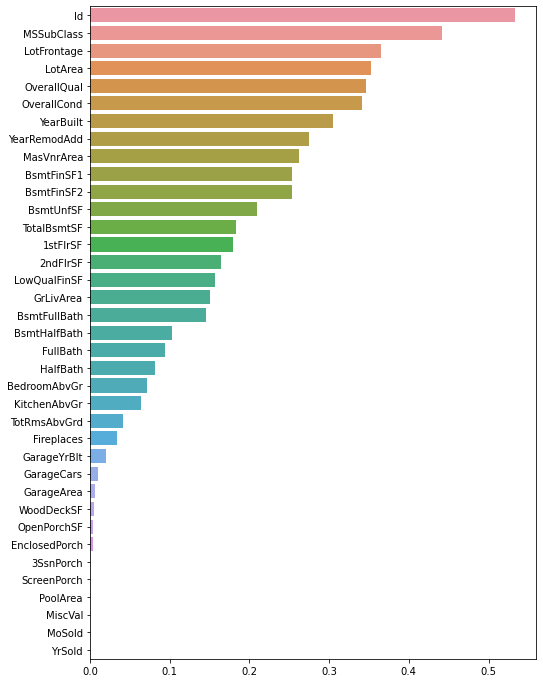

In [180]:
plt.figure(figsize=(8,12))
sns.barplot(y=mutual_information_features_reg.index,x=mutual_information_features_reg.sort_values(ascending=False))

In [181]:
mutual_information_features_reg.sort_values()

BsmtHalfBath     0.000000
MiscVal          0.000000
3SsnPorch        0.000000
MoSold           0.000000
BsmtFullBath     0.000000
YrSold           0.000266
ScreenPorch      0.003298
Id               0.004427
LowQualFinSF     0.005390
PoolArea         0.006521
KitchenAbvGr     0.010668
BsmtFinSF2       0.020333
EnclosedPorch    0.033774
BedroomAbvGr     0.041074
HalfBath         0.064668
MasVnrArea       0.071867
WoodDeckSF       0.081359
BsmtUnfSF        0.094680
OverallCond      0.102680
Fireplaces       0.145333
BsmtFinSF1       0.150177
OpenPorchSF      0.157062
LotArea          0.163897
TotRmsAbvGrd     0.179108
2ndFlrSF         0.182610
LotFrontage      0.210111
FullBath         0.253026
MSSubClass       0.253644
YearRemodAdd     0.262116
GarageYrBlt      0.275131
1stFlrSF         0.305058
YearBuilt        0.341602
TotalBsmtSF      0.346822
GarageArea       0.351989
GarageCars       0.365164
GrLivArea        0.441024
OverallQual      0.533335
dtype: float64

In [182]:
## Selecting the Kbest feature

In [183]:
from sklearn.feature_selection import SelectKBest

In [184]:
Fifteen_best_features = SelectKBest(mutual_info_regression,k=15)

In [185]:
Fifteen_best_features

SelectKBest(k=15,
            score_func=<function mutual_info_regression at 0x0000026F0BFE6AF0>)

In [186]:
sel_fifteen_cols = Fifteen_best_features.fit(X_train,Y_train)

In [187]:
X_train_cols = X_train.columns[sel_fifteen_cols.get_support()]

In [188]:
X_train=X_train.loc[:,X_train_cols]

In [189]:
X_train.shape

(1022, 15)

In [190]:
from sklearn.feature_selection import SelectPercentile

In [191]:
twentieth_percentile = SelectPercentile(mutual_info_regression,percentile=20)

In [192]:
twentieth_percentile.fit(X_train,Y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x0000026F0BFE6AF0>)

In [193]:
X_train_cols = X_train.columns[twentieth_percentile.get_support()]

In [194]:
len(twentieth_percentile.get_support())

15

In [195]:
X_train = X_train.loc[:,X_train_cols]

In [196]:
X_train.shape

(1022, 3)

### Chi-square test

In [216]:
data = sns.load_dataset('titanic')

In [217]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [218]:
cat_col = data.select_dtypes(exclude=['int','float']).columns.tolist()

In [219]:
col=['sex','embarked','alone','class','survived']

In [220]:
data = data[col]

In [221]:
#In this feature selection we compute the Chi-squared score which determines the relationship between the 
#predictor(categorical) and a dependent variable(categorical). Higher the score stronger the dependency between the 
#Using this feature selection technique you will be able to discard the categorical variables which are independent of class
# and thus irrelevant for classification

In [222]:
data.head()

,sex,embarked,alone,class,survived
0,male,S,False,Third,0
1,female,C,False,First,1
2,female,S,True,Third,1
3,female,S,False,First,1
4,male,S,True,Third,0


In [230]:
data["embarked"].fillna(data["embarked"].mode()[0],inplace=True)

In [231]:
from sklearn.preprocessing import OrdinalEncoder

In [232]:
sorted(data["class"].unique())

['First', 'Second', 'Third']

In [233]:
[sorted(data[i].unique().tolist()) for i in data.drop('survived',axis=1).columns.tolist()]

[['female', 'male'],
 ['C', 'Q', 'S'],
 [False, True],
 ['First', 'Second', 'Third']]

In [234]:
oe=OrdinalEncoder(categories=[sorted(data[i].unique().tolist()) for i in data.drop('survived',axis=1).columns.tolist()])

In [235]:
X = data.drop("survived",axis=1)
Y = data["survived"]

In [236]:
from sklearn.model_selection import train_test_split

In [242]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [243]:
X_train1 = oe.fit_transform(X_train)

In [246]:
X_train=pd.DataFrame(data=X_train1,columns=X_train.columns)

In [247]:
X_train.head()

,sex,embarked,alone,class
0,0.0,0.0,1.0,2.0
1,0.0,0.0,0.0,1.0
2,1.0,2.0,1.0,2.0
3,1.0,2.0,1.0,2.0
4,1.0,2.0,1.0,1.0


In [248]:
X_test=pd.DataFrame(data=oe.transform(X_test),columns=X_test.columns)

### Perform Chi-square

In [250]:
from sklearn.feature_selection import chi2

In [252]:
f_p_values = chi2(X_train,Y_train)

In [282]:
pd.DataFrame(data=data2,columns=["Chi_score","P_value"],index=X_train.columns)

,Chi_score,P_value
sex,69.658775,7.050438e-17
embarked,7.642190,5.701865e-03
alone,15.943564,6.525928e-05
class,38.518323,5.424204e-10


In [280]:
data2 = np.append(f_p_values[0].reshape(4,1),f_p_values[1].reshape(4,1),axis=1)

### Recursive Feature Elimination

In [300]:
##It is the method where we fit a model to the RFE class in sklearn, we tell it how many(m) features do I want to select
#then it trains the model on all the features and then it computes the feature importance and eliminate the 
#least important feature then it retrains the model on (n-1) features and then eliminate the least important one 
#according to the feature importance and this process repeats until we have m features left

In [4]:
from sklearn.feature_selection import RFE

In [5]:
from sklearn.datasets import load_diabetes

In [6]:
data = load_diabetes()

In [7]:
X = pd.DataFrame(data=data.data,columns=data.feature_names)
Y = data.target

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rfc = RandomForestClassifier()

In [14]:
rfe = RFE(estimator=rfc,n_features_to_select=6)

In [15]:
rfe.fit(X_train,Y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=6)

In [18]:
for i,col in zip(range(X_train.shape[1]),X_train.columns):
    print("{} selected = {} rank = {}".format(col,rfe.get_support()[i],rfe.ranking_[i]))

age selected = True rank = 1
sex selected = False rank = 5
bmi selected = True rank = 1
bp selected = False rank = 2
s1 selected = True rank = 1
s2 selected = True rank = 1
s3 selected = True rank = 1
s4 selected = False rank = 4
s5 selected = True rank = 1
s6 selected = False rank = 3


In [19]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
332,0.030811,-0.044642,0.104809,0.076958,-0.011201,-0.011335,-0.058127,0.034309,0.057108,0.036201
307,0.067136,0.050680,-0.030996,0.004658,0.024574,0.035638,-0.028674,0.034309,0.023371,0.081764
328,-0.038207,-0.044642,0.067085,-0.060756,-0.029088,-0.023234,-0.010266,-0.002592,-0.001496,0.019633
275,-0.005515,0.050680,-0.011595,0.011544,-0.022208,-0.015406,-0.021311,-0.002592,0.011011,0.069338
414,0.081666,0.050680,0.006728,-0.004534,0.109883,0.117056,-0.032356,0.091875,0.054720,0.007207
